# Extra notebook on classifiers
* Naive Bayes (Bernoulli and Gaussian)
* Linear/quadratic discriminant analysis
* More than 2 classes

In [1]:
# Load files from introMLNB 


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split


## Naive Bayes part 1 (Bernoulli cases)

* Target variable is [0,1]
* Forecast variables (maybe many) are all [0,1]
* See in Scikit Learn multinomial Naive Bayes for extensions to multi case inputs


In [2]:
# function to make Bernoulli data
# This is constructed so that a good classifier should get it right with prob = 0.75 (why?)
def make_bClass(n):
    # two Forecast variables, both binary
    X = np.random.choice([0,1],size=(n,2))
    # defined target prob = 1
    #  (0,0) p = 0
    #  (0,1), (1,0) p = 0.5
    #  (1,1) p = 1
    p = np.mean(X,axis=1)
    y = (np.random.uniform(low=0.,high=1.,size=n)<p)
    return X,y

In [14]:
# Basic train/test sample on Bernoulli
X, y = make_bClass(30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
print(bnb.score(X_train,y_train))
print(bnb.score(X_test,y_test))


0.8181818181818182
0.75


In [15]:
# Now a monte-carlo
# Test train/test on many cases
# report averages
# Python note: use NP arrays to store results
nmc = 1000
nsamp = 30
trainSampleScore = np.zeros(nmc)
testSampleScore = np.zeros(nmc)
for i in range(nmc):
    X,y = make_bClass(nsamp)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
    bnb = BernoulliNB()
    bnb.fit(X_train,y_train)
    trainSampleScore[i] = bnb.score(X_train,y_train)
    testSampleScore[i]  = bnb.score(X_test,y_test)

print(np.mean(trainSampleScore))
print(np.mean(testSampleScore))

0.8446666666666668
0.7433333333333333


## Naive Bayes part 2: Gaussian
* Naive Bayes can be easily extended continuous random forecast variables
* Assume these are Gaussian
* Different means for different classes
* Assume independent
* This is also a foundation for other classifiers (discriminant)

In [18]:
# generate points around two different means
# classify these as zero or one
# scramble the data
def make_gclass(n,mu1,mu2):
    x1 = np.random.normal(size=(n,2),loc=mu1,scale=1.)
    x2 = np.random.normal(size=(n,2),loc=mu2,scale=1.)
    y1 = np.zeros(n)
    y2 = np.ones(n)
    Xsource = np.append(x1,x2,axis=0)
    Ysource = np.append(y1,y2)
    scramIndex = np.random.randint(low=0,high=2*n,size=n)
    X = Xsource[scramIndex]
    Y = Ysource[scramIndex]
    return X,Y

In [33]:
X,y = make_gclass(50,-0.5,0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [34]:
# fit Gaussian NB classifier
gnb = GaussianNB()
trainFit = gnb.fit(X_train,y_train)
print(trainFit.score(X_train,y_train))
print(trainFit.score(X_test, y_test))

0.6
0.56


In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.5,solver="lbfgs")
trainFit = lr.fit(X_train,y_train)
print(trainFit.score(X_train,y_train))
print(trainFit.score(X_test, y_test))

0.6
0.68


X.shape: (50, 2)


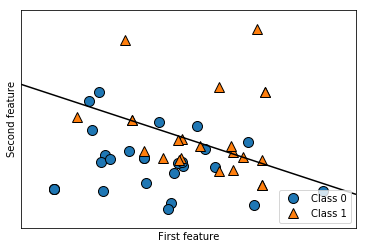

In [36]:
import mglearn
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
mglearn.plots.plot_2d_separator(trainFit,X,fill=False)

## Linear discriminant
* See notes for comparisons with Naive Bayes
* They are mathematically close

### New assumptions
* Forecast variances can be dependent / multivariate normal
* Variances/convariances are assumed the same in the different classes
* This last assumption yields the linear separation result

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
trainFit = lda.fit(X_train,y_train)
print(trainFit.score(X_train,y_train))
print(trainFit.score(X_test,y_test))

0.6
0.68


X.shape: (50, 2)


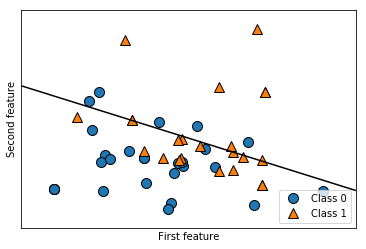

In [38]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
mglearn.plots.plot_2d_separator(trainFit,X, fill=False)

## Quadratic Discrimant 
* Relax common var/cov matrix across class assumption
* Now boundaries are quadratic
* Closer to original Naive Bayes Gaussian but
* with variance/covariance dependence
* (See notes for more info)

In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
trainFit = qda.fit(X_train,y_train)
print(trainFit.score(X_train,y_train))
print(trainFit.score(X_test,y_test))

0.6
0.56


X.shape: (50, 2)


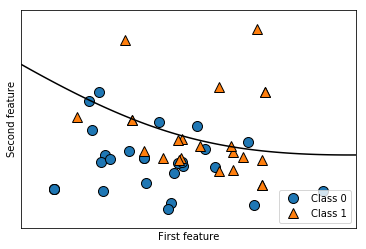

In [40]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
mglearn.plots.plot_2d_separator(trainFit,X, fill=False)

# Quick comparison with Support Vector Classifier
* Let's quickly drop an SVM in
* Note how close this is to linear discriminent 

0.72
0.68
0.68
0.68
X.shape: (50, 2)


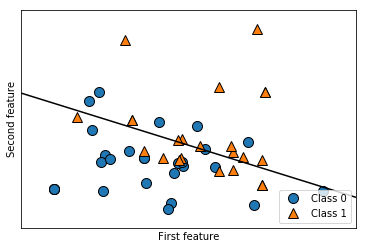

In [41]:
# Quick check of an svm
# Note that C = 1. is the default
svm = LinearSVC(C=1)
trainFit = svm.fit(X_train,y_train)
print(trainFit.score(X_train,y_train))
print(trainFit.score(X_test,y_test))
# Quick experiment with low C, simpler model (higher complexity penalty)
svm2 = LinearSVC(C=0.01)
trainFit2 = svm2.fit(X_train,y_train)
print(trainFit2.score(X_train,y_train))
print(trainFit2.score(X_test,y_test))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
mglearn.plots.plot_2d_separator(trainFit,X, fill=False)

## Quick summary
### Types of Naive Bayes type classifiers
* Assume Var/Cov is identity (independent forecasts) and same for all classes
    * Gassian Naive Bayes / linear boundaries (not in Scikit Learn)
* Assume Var/Cov is identity but different over classes
    * Gaussian Naive Bayes (as in scikit learn)
* Assume Var/Cov is regular matrix (dependence) but same over classes
    * Linear discriminant
* Assume Var/Cov is different over classes
    * Quadratic discriminant

# Multiple (K>2) classes
* What do you do when more than two classes?
* This can be tricky
* Many methods

In [42]:
# Simulate three classes/Gaussian forecasts
def make_gclass3(n,mu1,mu2):
    # note:  this puts the mean at (mu1,mu1) in (x,y) space
    x1 = np.random.normal(size=(n,2),loc=mu1,scale=1.)
    # This will be (mu2,mu2)
    x2 = np.random.normal(size=(n,2),loc=mu2,scale=1.)
    # this is (mu1,mu2)
    x3 = np.random.normal(size=(n,2),loc=(mu1,mu2),scale=1.)
    # n of each class (0,1,2)
    y1 = np.zeros(n)
    y2 = np.ones(n)
    y3 = 2*np.ones(n)
    # stack the data up
    Xsource = np.append(x1,x2,axis=0)
    Xsource = np.append(Xsource,x3,axis=0)
    Ysource = np.append(y1,y2)
    Ysource = np.append(Ysource,y3)
    scramIndex = np.random.randint(low=0,high=3*n,size=n)
    X = Xsource[scramIndex]
    Y = Ysource[scramIndex]
    return X,Y

In [43]:
X,y = make_gclass3(50,-0.8,0.8)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

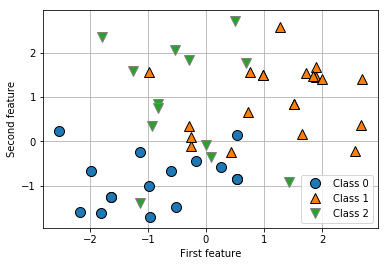

In [44]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1","Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.grid()

In [45]:
gnb = GaussianNB()
trainFit = gnb.fit(X_train,y_train)
print(trainFit.score(X_train,y_train))
print(trainFit.score(X_test, y_test))
print(gnb.predict(X_test))

0.88
0.76
[0. 1. 2. 0. 0. 1. 2. 1. 2. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 2. 2. 2. 2. 1.
 1.]


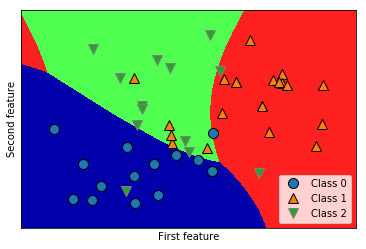

In [46]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1","Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.plots.plot_2d_classification(trainFit,X, fill=True)

In [47]:
lda = LinearDiscriminantAnalysis()
trainFit = lda.fit(X_train,y_train)
print(trainFit.score(X_train,y_train))
print(trainFit.score(X_test, y_test))

0.84
0.72


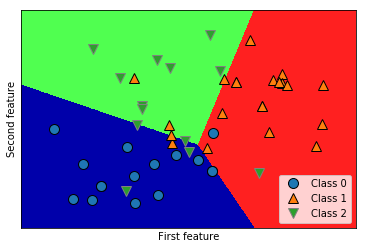

In [48]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1","Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.plots.plot_2d_classification(lda,X, fill=True)

In [49]:
svc = LinearSVC(C=1.)
trainFit = svc.fit(X_train,y_train)
print(trainFit.score(X_train,y_train))
print(trainFit.score(X_test, y_test))

0.88
0.68


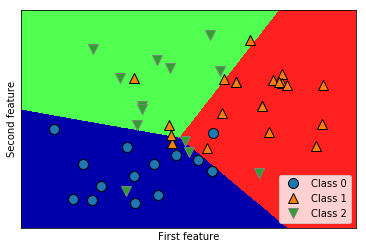

In [50]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1","Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.plots.plot_2d_classification(trainFit,X, fill=True)